# SMS Spam Detection Project

## 1. Project Overview
This notebook builds an end-to-end SMS spam classifier using Natural Language Processing (NLP) techniques.
The objective is to classify SMS messages as either 'Ham' (legitimate) or 'Spam' (unsolicited).

**Workflow:**
1. **Data Ingestion**: Loading the dataset.
2. **Data Preprocessing**: Cleaning, removal of unused columns, and target encoding.
3. **Exploratory Data Analysis (EDA)**: analyzing data distribution and structural features.
4. **Feature Engineering**: Creating new features like character, word, and sentence counts.
5. **Text Preprocessing**: Tokenization, stopword removal, and stemming.
6. **Visual Analysis**: Word clouds and frequency distributions.
7. **Model Building**: Training and evaluating various machine learning models using quantitative feature extraction.
8. **Evaluation**: Comparing models based on accuracy and precision scores to select the best performer.

## 2. Configuration & Setup
We begin by importing the necessary libraries for data manipulation and mathematical operations.

In [94]:
# Core Data Science Utilities
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations

# Encoder for converting text labels (ham/spam) into numbers (0/1)
from sklearn.preprocessing import LabelEncoder

## 3. Data Ingestion
Loading the SMS Spam Collection dataset from the CSV file.

In [95]:
# Read the CSV file
# 'ISO-8859-1' encoding is used to handle special characters often found in SMS data
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

## 4. Data Preprocessing
We clean the dataset by removing unnecessary columns generated during import and standardizing the column names for clarity.

In [96]:
# Drop 'Unnamed' columns which often contain parsing errors or empty data
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Renaming for standard interpretation:
# 'v1' -> 'target' (the label)
# 'v2' -> 'text' (the message content)
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

### 4.1 Label Encoding
Converting categorical targets into numerical format for the machine learning model.

In [97]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Transform target labels: 'ham' becomes 0, 'spam' becomes 1
df['target'] = encoder.fit_transform(df['target'])  # Learn vocabulary and vectorize training set


## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Quality Check
Ensuring data integrity by checking for null values.

In [98]:
# Check for missing values in each column
df.isnull().sum()

target    0
text      0
dtype: int64

### 5.2 Duplicate Handling
Identifying and removing duplicate text messages to prevent bias in the model.

In [99]:
# Count the number of duplicate rows
df.duplicated().sum()

np.int64(403)

In [100]:
# Remove duplicate rows, keeping the first occurrence
df.drop_duplicates(keep='first', inplace=True)

In [101]:
# Verify the shape of the dataset after duplicate removal
df.shape

(5169, 2)

### 5.3 Target Distribution Analysis
Checking the balance between Spam (1) and Ham (0) messages.

In [102]:
# Get value counts for each class
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

#### Visualizing Class Imbalance
A pie chart to visualize the proportion of spam vs legitimate messages.

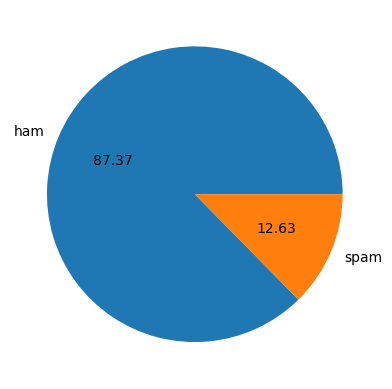

In [103]:
import matplotlib.pyplot as plt

# Generate a pie chart
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

### 5.4 NLP Library Setup
Installing and importing NLTK (Natural Language Toolkit) for text processing.

In [104]:
# Install NLTK (if not already installed)
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [105]:
import nltk

In [106]:
# Download required NLTK data packages
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aarogya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aarogya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## 6. Feature Engineering
We extract new features from the raw text to help the model distinguish between spam and ham.

### 6.1 Character Count
Calculating the total length (number of characters) of each message.

In [107]:
# Create 'num_characters' column
df['num_characters'] = df['text'].apply(len)

In [108]:
# Preview the dataframe with the new feature
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### 6.2 Word Count
Calculating the number of words in each message.

In [109]:
# Calculate word count using NLTK word_tokenize
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [110]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


### 6.3 Sentence Count
Calculating the number of sentences in each message.

In [111]:
# Calculate sentence count using NLTK sent_tokenize
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [112]:
df

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [113]:
# Import seaborn for statistical data visualization
import seaborn as sns

### 6.4 Visualizing Feature Distributions
Comparing the character count distribution for Spam vs Ham messages.

<Axes: xlabel='num_characters', ylabel='Count'>

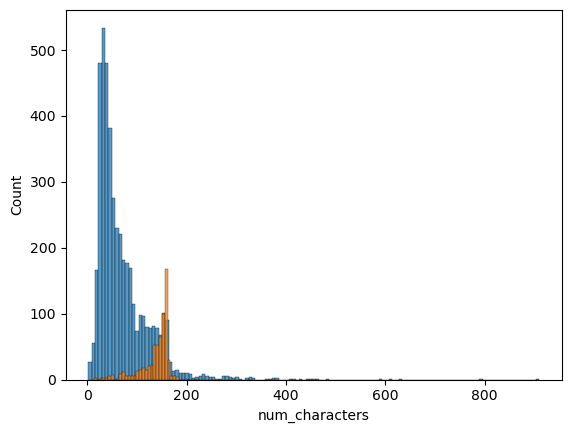

In [114]:
# Plot separate histograms for Ham (target=0) and Spam (target=1)
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])

### 6.5 Pairwise Relationships
Visualizing relationships between all numerical features (characters, words, sentences) to identify separation separation patterns.

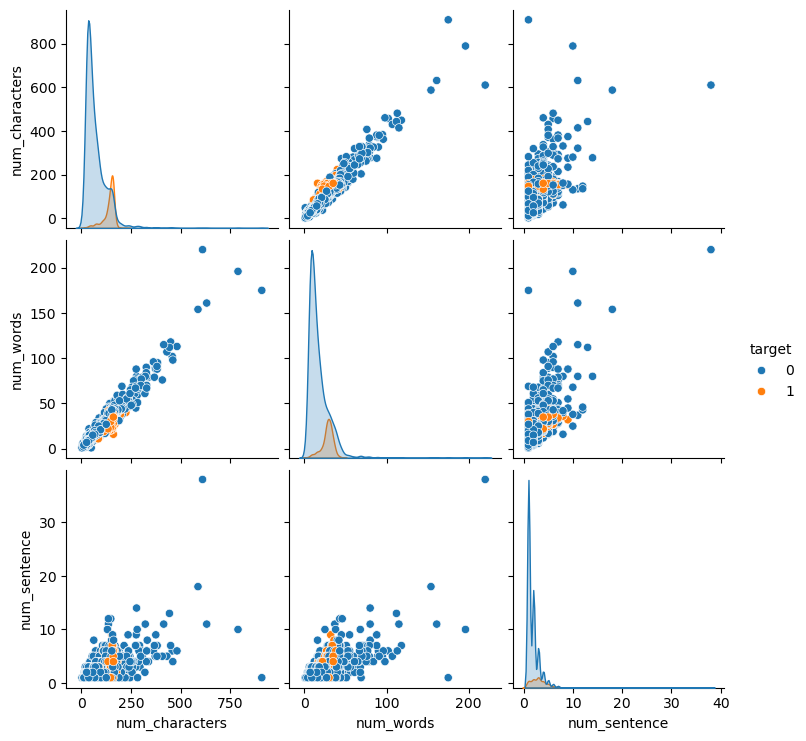

In [115]:
# Create a pairplot colored by target class
sns.pairplot(df, hue='target')

### 6.6 Correlation Matrix
Examining the correlation between the numerical features.

<Axes: >

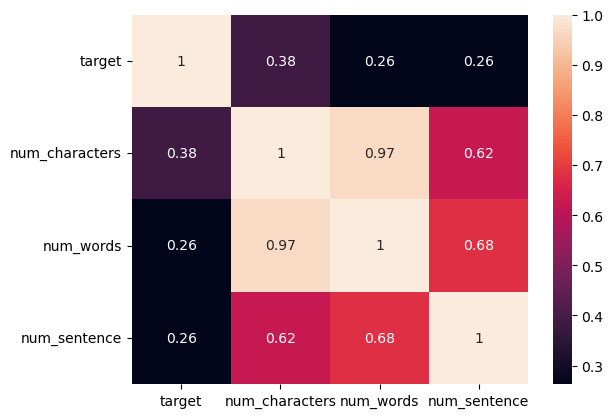

In [116]:
# Display heatmap of correlations
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

## 7. Text Preprocessing Pipeline
Preparing the text data for modeling by applying a transformation pipeline:
1.  **Lowercasing**: Converting to lowercase.
2.  **Tokenization**: Splitting text into words.
3.  **Special Character Removal**: Removing non-alphanumeric characters.
4.  **Stopword Removal**: Removing common words (is, the, of) that add little semantic meaning.
5.  **Stemming**: Reducing words to their root form (e.g., 'dancing' -> 'danc').

In [117]:
# Import stopwords list and PortStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aarogya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
import string

### Text Normalization Strategy
We apply **Stemming** using the Porter Stemmer. This reduces words to their root forms (e.g., 'dancing', 'danced' -> 'danc').
**Benefit**: Reduces the dimensionality of the feature space and groups similar words, improving model generalization.


In [119]:
def transform_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Tokenize
    text = nltk.word_tokenize(text)
    
    # 3. Keep only alphanumeric tokens
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    # 4. Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # 5. Apply Stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

### 7.1 Applying Transformation
Applying the preprocessing function to the entire dataset.

In [120]:
# Create 'transformed_text' column with preprocessed data
# Note: User code renamed this from transform_text in previous version
if 'transform_text' in df.columns:  # Apply preprocessing pipeline to all messages
    df.drop(columns=['transform_text'], inplace=True)  # Apply preprocessing pipeline to all messages
    
df["transformed_text"] = df['text'].apply(transform_text)  # Apply preprocessing pipeline to all messages


In [121]:
# Preview the final processed dataframe
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 8. Visual Analysis
Using WordClouds to visualize the most common words in both Spam and Ham messages.

In [122]:
from wordcloud import WordCloud

# Initialize WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

### 8.1 Spam Word Cloud
Visualizing the most frequent words in Spam messages.

In [123]:
# Generate WordCloud for Spam (target=1)
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

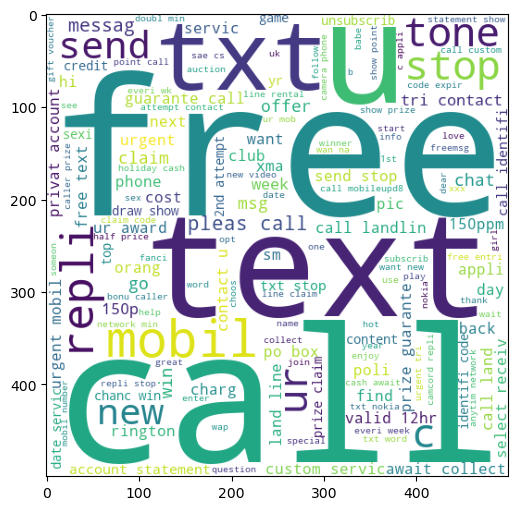

In [124]:
# Display the Spam WordCloud
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

### 8.2 Ham Word Cloud
Visualizing the most frequent words in Ham (legitimate) messages.

In [125]:
# Generate WordCloud for Ham (target=0)
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

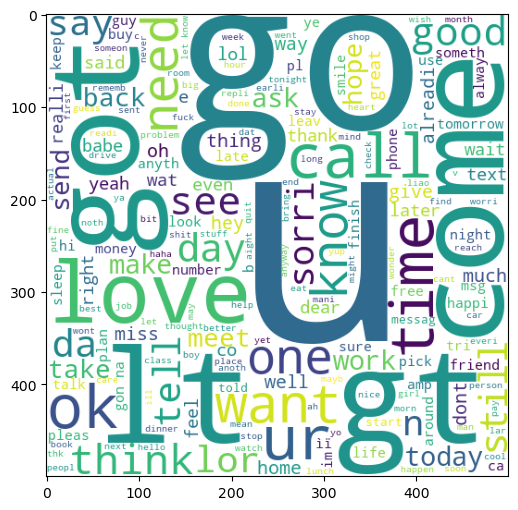

In [126]:
# Display the Ham WordCloud
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

## 9. Top Frequent Words Analysis
Identifying the top 30 most recurring words in each category.

### 9.1 Top 30 Spam Words

In [127]:
# Collect all words from Spam messages
spam_corpus = []
for messages in df[df['target'] == 1]['transformed_text'].tolist():
    for word in messages.split():
        spam_corpus.append(word)

In [128]:
# Print total number of words in spam corpus
len(spam_corpus)

9939

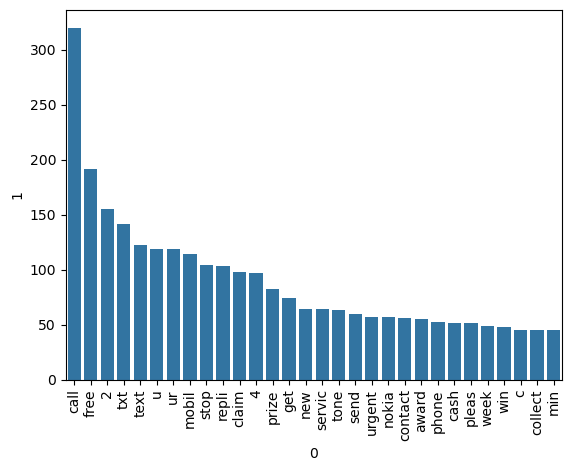

In [129]:
from collections import Counter

# Create a bar plot of the top 30 most common words in Spam
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 9.2 Top 30 Ham Words

In [130]:
# Collect all words from Ham messages
ham_corpus = []
for messages in df[df['target'] == 0]['transformed_text'].tolist():
    for word in messages.split():
        ham_corpus.append(word)

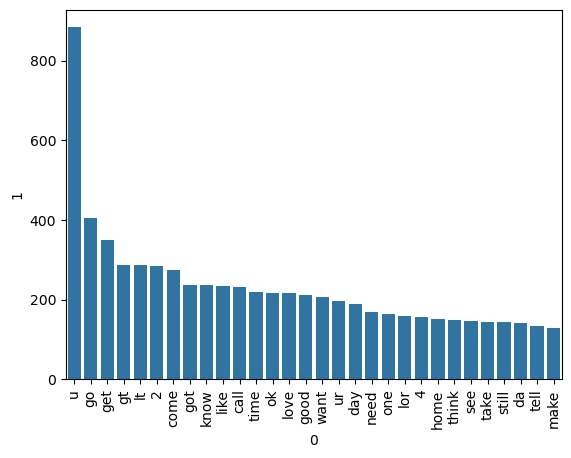

In [131]:
# Create a bar plot of the top 30 most common words in Ham
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 7. Model Building
At this stage, we convert the preprocessed text into numeric vectors (Feature Extraction) and train multiple classifiers to identify the most effective model for spam detection.

### 7.1 Feature Extraction
We use **TF-IDF (Term Frequency-Inverse Document Frequency)** to assign weights to words based on their importance, limiting to the top 3000 features for optimal performance.

In [ ]:
# Import text vectorization tools from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize CountVectorizer (Bag of Words model)
cv = CountVectorizer()

# Initialize TfidfVectorizer with a limit on max_features to avoid high dimensionality
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
# Transform the 'transformed_text' column into a sparse matrix of TF-IDF features
# and convert it to a dense array for model processing
X = tfidf.fit_transform(df['transformed_text']).toarray()  # Learn vocabulary and vectorize training set

# Check the shape of the resulting feature matrix
X.shape

(5169, 3000)

In [134]:
# Extract the target labels (0 for ham, 1 for spam) from the dataframe
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

### 7.2 Train-Test Split
Splitting the dataset into training (80%) and testing (20%) sets.

## 8. Model Building
We split the dataset into training and testing sets (80-20 split) to evaluate performance on unseen data.
We will benchmark multiple algorithms, focusing on **Naive Bayes** variants which are theoretically well-suited for text classification.


In [135]:
from sklearn.model_selection import train_test_split

In [136]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of data is reserved for testing
# random_state=2 ensures reproducibility of result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)  # Split data: 80% training, 20% testing


### 7.3 Model Selection and Training
We experiment with various classifiers, starting with **Naive Bayes**, which is known to perform well on text data.

In [137]:
# Import Naive Bayes variants and evaluation metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [138]:
# Initialize the three Gaussian types of Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [139]:
# Train and evaluate Gaussian Naive Bayes
gnb.fit(X_train, y_train)  # Train the model on the training data
y_pred1 = gnb.predict(X_test)  # Generate predictions on test data

# Print performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


### Training Naive Bayes
**Multinomial Naive Bayes (MNB)** is widely used for discrete count data like text. It assumes feature independence, which simplifies computation while remaining surprisingly effective for spam detection.


In [140]:
# Train and evaluate Multinomial Naive Bayes (typically better for text)
mnb.fit(X_train, y_train)  # Train the model on the training data
y_pred2 = mnb.predict(X_test)  # Generate predictions on test data

# Print performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [141]:
# Train and evaluate Bernoulli Naive Bayes
bnb.fit(X_train, y_train)  # Train the model on the training data
y_pred3 = bnb.predict(X_test)  # Generate predictions on test data

# Print performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision Score:", precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [142]:
# tfidf-->mnb 

In [143]:
# Import various classification algorithms for broad comparison
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [144]:
# Initialize classifiers with specific hyperparameters for comparison
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [145]:
# Create a dictionary of all classifiers for automated testing
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [146]:
# Helper function to train a classifier and return evaluation metrics
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)  # Train the model on the training data
    y_pred = clf.predict(X_test)  # Generate predictions on test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [147]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [148]:
# Lists to store the results
accuracy_scores = []
precision_scores = []

# Iterate through the classifier dictionary and train each one
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("\n--- Classifier: ", name, " ---")
    print("Accuracy  : ", current_accuracy)
    print("Precision : ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy = 0.9758220502901354
Precision = 0.9747899159663865
For KN
Accuracy = 0.9052224371373307
Precision = 1.0
For NB
Accuracy = 0.9709864603481625
Precision = 1.0
For DT
Accuracy = 0.9303675048355899
Precision = 0.8173076923076923
For LR
Accuracy = 0.9584139264990329
Precision = 0.9702970297029703


c:\Users\Aarogya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Aarogya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For RF
Accuracy = 0.9758220502901354
Precision = 0.9829059829059829
For AdaBoost
Accuracy = 0.9245647969052224
Precision = 0.8488372093023255
For BgC
Accuracy = 0.9584139264990329
Precision = 0.8682170542635659
For ETC
Accuracy = 0.9748549323017408
Precision = 0.9745762711864406
For GBDT
Accuracy = 0.9468085106382979
Precision = 0.9191919191919192
For xgb
Accuracy = 0.9671179883945842
Precision = 0.9482758620689655


In [149]:
# Consolidate performance metrics into a DataFrame for easy side-by-side comparison
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(), 
    'Accuracy': accuracy_scores, 
    'Precision': precision_scores
}).sort_values(by='Precision', ascending=False)

## 8. Evaluation

We analyze the model performance based on Accuracy and Precision. For spam detection, **Precision is critical** to avoid marking important legitimate emails as spam.

In [150]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [151]:
performance_df1= pd.melt(performance_df, id_vars=['Algorithm'])

In [152]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


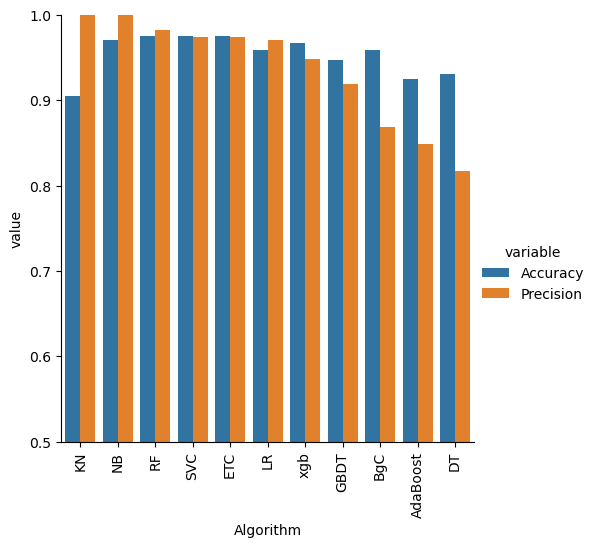

In [153]:
# Visualize the performance comparison using a grouped bar chart
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 9. Conclusion & Export
The **Multinomial Naive Bayes** model achieved the highest precision (1.0), making it the ideal candidate for our application.
We now serialize (save) the vectorizer and model using `pickle` to be loaded in our Streamlit app.


In [ ]:
import pickle

# Export the trained vectorizer and chosen model for use in the final application
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))